In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 05 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


with contributions totally ripped off from Gautham Narayan (UIUC, Michael Steinbach (UMN), and Nico Adams (UMN)

# Where are we headed?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> <b> Analysis of Time series (stochastic processes) </b> -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

# Last Class: How do we know an object is variable?

## If $A=0$ (no variability)
* ### $\chi^2_{\rm dof}=\frac{1}{N} \sum_j \left(\frac{y_j}{\sigma}\right)^2 \sim V/\sigma^2$
* ### $\chi^2_{\rm dof}$ has  expectation value of 1 and std dev  of $\sqrt\frac{2}{N}$

## If $|A|>0$ (variability)
* ### $\chi^2_{\rm dof}$ will be larger
than 1. 
* ### probability that $\chi^2_{\rm dof}>1 + 3 \sqrt{2/N}$  is about 1 in 1000 (i.e., $>3\sigma$ above 1)

# Today: Stochastic Processes

If a system is always variable, but the variability is not (infinitely) predictable, then we have a [**stochastic**](https://en.wikipedia.org/wiki/Stochastic) process.  

Stochastic does not mean you cannot characterize this process, and make statistical statements about it.

<img src="figures/quasar_schema.png" width=400>

Take a (stochastically varying) quasar which has both *line* and *continuum* emission and where the line emission is stimulated by the continuum.  Since there is a physical separation between the regions that produce each type of emission, we get a delay between the light curves as can be seen here:

<img src="https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure24.jpg" width=400>

## The correlation function

Instead of the auto-correlation function, we can look at the more general correlation function - this gives us information about the time delay between 2 processes.  

If one time series is derived from another simply by shifting the time axis by $t_{\rm lag}$, then their correlation function will have a peak at $\Delta t = t_{\rm lag}$.

The correlation function between $f(t)$, and $g(t)$ is defined as

### $${\rm CF}(\Delta t) = \frac{\lim_{T\rightarrow \infty}\frac{1}{T}\int_T f(t)g(t+\Delta t)dt }{\sigma_f \sigma_g}$$

Computing the correlation function is basically the mathematical processes of sliding the two curves over each other and computing the degree of similarity for each step in time.  

The peak of the correlation function reveals the time delay between the processes.  Below we have the correlation function of the line and continuum emission from a quasar, which reveals a $\sim$ 15 day delay between the two.


<img src="https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure25.jpg" width=400>

### What can the ACF tell us?

If the values of $y$ are uncorrelated, then ACF$(\Delta t)=0$ (except for ACF$(0)=1$).

For processes that "retain memory" of previous states only for some characteristic time $\tau$, the ACF will vanish for $\Delta t \gg \tau$.

Turning that around, the predictability of future behavior of future behavior of such a process is limited to times up to $\sim \tau$; you have to "let the process run" to know how it will behave at times longer than that.

### The Structure Function

The *structure function* is another quantity that is frequently used in astronomy and is related to the ACF:

### $${\rm SF}(\Delta t) = {\sigma}_\infty[1 - {\rm ACF}(\Delta t)]^{1/2}$$

where ${\sigma}_\infty$ is the standard deviation of the time series as evaluated on timescales much larger than any charateristic timescale.

The structure function is interesting because it's equal to the standard deviation of the distribution of the differences of $y(t_2) - y(t_1)$ evaluated at many different $t_1$ and $t_2$ (i.e., with a time lag of $\Delta t = t_2 - t_1$), and divided by $\sqrt 2$.

This is of practical use: if I have a series of observations $y_i$ (taken at random times $t_i$) it's relatively straighforward to compute the structure function.

### Damped Random Walk

A DRW is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, hence the name **damped random walk**.   

The ACF for a DRW is given by

### $$ ACF(t) = \exp(-t/\tau)$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The DRW structure function can be written as
### $$ SF(t) = \sigma_{\infty}[1-\exp(-t/\tau)]^{1/2}$$

# Notice what's happening

We are **not** writing down a model for the observations directly anymore (they are a stochastic process so what'd be be the point)

**We are writing down a model for how the observations are correlated with each other**

###  Structure Function for Dampled Random Walk

<img src="figures/MacLeod2010.png" alt="Drawing" style="width: 400px;"/>

The SF example above was an example of a DRW: the light curve is strongly correlated a short timescales, but uncorrelated at long timescales. 

This is observed in optical variability of quasar continuum light; in fact, it works so well that one can use this model to distinguish quasars from stars, based solely on the variability they exhibit.

If you can make the ACF or SF, then you can jolly well take it's Fourier Transform to get the:

### Power Spectral Density

The Fourier Transform of an ACF is the [Power Spectral Density (PSD)](https://en.wikipedia.org/wiki/Spectral_density).  So, the PSD is an analysis in frequency space and the ACF is in time space.

(the Wiener-Khinchin theorem describes the fact that the ACF and PSD are a Fourier pair) 

For example, for a sinusoidal function in time space, the ACF will have the same period, $T$. Conversly, the PSD in frequency space will be a $\delta$ function centered on $\omega = 1/2\pi T$.

For our nice quasar without an analytic model but with an analytic form for the ACF, the PSD is then:

### $$ PSD(f) = \frac{\tau^2 \sigma_{\infty}^2}{1+(2\pi f \tau)^2}$$

which means that a DRW is a $1/f^2$ process at high frequency. The **damped** part comes from the flat PSD at low frequency.

More generically, if 

### $${\rm SF} \propto t^{\alpha}$$

then 

### $${\rm PSD} \propto \frac{1}{f^{1+2\alpha}}$$

So an analysis of a stochastic system can be done with either the ACF, SF, or PSD.

### Different stochastic processes can be categorized based on their ACF/PSD

* A stochastic process with $1/f^2$ spectrum is known as random walk (if discrete) or Brownian motion (or, more accurately, Wiener process) if continuous. These physically occur when the value being observed is subjected to a series of independent changes of similar size. It's also sometimes called as "red noise". Quasar variability exhibits $1/f^2$ properties at high frequencies (that is, short time scales, below a year or so). 

* A stochastic process with $1/f$ spectrum are sometimes called "long-term memory processes" (also sometimes know as "pink noise"). They have equal energy at all octaves (or over any other logarithmic frequency interval). This type of process has infinite variance and an undefined mean (similar to a Lorentzian distribution). 

* A process with a constant PSD is frequently referred to as "white noise" -- it has equal intensity at all frequencies. This is a process with no memory -- each measurement is independent of all others. i.e. white noise is I.I.D 

## Recap

If you get a time-series:

### $$ (t_1, m_1), (t_2, m_2), ... , (t_N, m_n) $$

- and you get luck enough to have a parametric model then you know what to do from first half of semester
- you can say something about the **correlation structure** (*even if no explicit model for observations*)
    - periodic processes
        - periodogram to find strong periods
        - can express as Fourier sum to construct a model and make predictions at future times
    - stochastic processes
        - ACF/SF
        - PSD
            - These are good for **characterizing** stochastic processes
                - can use *features* for tasks like *classification* (soon! week 11!) 
                
## But we're scientists and like to predict things (i.e. forecasting), not just characterize them - how do we do that for a generic time-series/process without an explicit model?

## Autoregressive Processes

Processes (like time-series) that "retain memory" of previous states, can be described by [autoregressive models](https://en.wikipedia.org/wiki/Autoregressive_model).

### You have already seen one of these:

Our old friend the random walk - every new value is given by the preceeding value plus some noise:

### $$y_i = y_{i-1} + \epsilon_i$$

If the coefficient of $y_{i-1}$ is $>1$ then it is known as a geometric random walk, which is typical of the stock market. These are **Markov Chains** 

(recall that not all Markov chains are stationary - they have to be positive recurrent and irreducible - i.e. you have to be able to get from every state to every other state in some finite time - it'd be dull if the stock market was stationary)

So, if you interview for a quant position on Wall Street, you tell them that you are an expert in using autoregressive geometric random walks to model stochastic processes.

In the random walk case above, each new value depends only on the immediately preceeding value.  But we can generalized this to include $p$ values:

### $$y_i = \sum_{j=1}^pa_jy_{i-j} + \epsilon_i$$

We refer to this as an [**autoregressive (AR)**](https://en.wikipedia.org/wiki/Autoregressive_model) process of order $p$: $AR(p)$.  

For a random walk, we have $p=1$, and the weights are just $a_1=1$.

If the data are drawn from a "stationary" process (one where it doesn't matter what region of the light curve you sample [so long as it is representative]), the $a_j$ satisfy certain conditions.

One thing that we might do then is ask whether a system is more consistent with $a_1=0$ or $a_1=1$ (noise vs. a random walk).

## An aside:

You might wonder why the stock market is well described by a geometric random walk, and doesn't need an AR(10) or something. Recall that geometric random walks are also good at describing the motions of inebriated humans. Most economic theory is based on the assumption of people being "Rational actors", leading to "Efficient Markets." 

Larry Summers would famously dispute this notion with the first line of a unpublished paper:
"There are idiots, look around."

Here are some example light curves for specific $AR(p)$ processes.  

![AR Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/400px-ArTimeSeries.svg.png)

* $AR(0)$: the light curve is simply responding to noise fluctuations.  


* $AR(1)$: the noise fluctuation responses are persisting for slightly longer as the next time step depends positively on the time before.  


* $AR(1)$ w/ $a_1 = 0.9$: nearly the full effect of the noise spike from the previous time step is applied again, giving particularly long and high chains of peaks and valleys.  


* $AR(2)$:  we have long, but low chains of peaks and valleys as a spike persists for an extra time step.  


* $AR(2)$ w/ $a_1 = 0.9$ and $a_2 = -0.8$: the response of a spike in the second time step has the opposite sign as for the first time step - both have large coefficients - peaks and valleys are both quite high and quite narrowly separated.

i.e. More general than simple periodic processes

## Moving Average Processes

A [**moving average (MA)**](https://en.wikipedia.org/wiki/Moving-average_model) process is similar to an AR process, but instead the value at each time step depends not on the *value* of previous time step, but rather the *perturbations* from previous time steps.  It is defined as

### $$y_i = \epsilon_i + \sum_{j=1}^qb_j\epsilon_{i-j}$$

So, for example, an MA(q=1) process would look like

### $$y_i = \epsilon_{i} + b_1\epsilon_{i-1},$$

whereas an AR(p=2) process would look like

### $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i$$


### So, in an $MA$ process a shock affects only the current value and $q$ values into the future.  In an $AR$ process a shock affects *all* future values. 

## You can combine AR and MA processes. These are creatively called ARMA processes

E.g. ARMA(2,1) model, which combines AR(2) and MA(1):


### $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}$$

# In-class Exercise: AR vs MA vs ARMA processes with a single shock

Generate data from 
* an $AR(2)$ w/ $a_1 = 0.5, a_2=0.2$
* an $MA(2)$ w/ $b_1 = 0.5, b_2=0.5$
* an $ARMA(2, 1)$ w/ $a_1 = 0.5, a_2=0.25, b_1 =0.5$

Add a "shock" (high epsilon value at t=3 - see how the different procsses respond

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

N=20


epsilon = np.random.randn(N+2) # complete me
epsilon[3] = 15 # complete me


yAR=np.zeros(N+2)
yMA=np.zeros(N+2)
yARMA=np.zeros(N+2)

for i in np.arange(N)+2:
    
    
    
    yAR[i] = # complete me 
    yMA[i] = # complete me
    yARMA[i] = # complete me

fig = plt.figure(figsize=(6, 6))
t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a_1=0.5, a_2=0.2")
plt.plot(t,yMA,label="MA(2), b_1=0.5, b_2=0.5")
plt.plot(t,yARMA,label="ARMA(2,1), a_1=0.5, a_2=0.25, b_1=0.5",zorder=0)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",prop={'size':8})

ax = plt.axes()

plt.show()

These videos might be useful:

[MA(1)](https://www.youtube.com/watch?v=lUhtcP2SUsg)

[AR(1)](https://www.youtube.com/watch?v=AN0a58F6cxA)

[ARMA(1,1)](https://www.youtube.com/watch?v=Pg0RnP1uLVc)

### CARMA Models

$AR$ and $ARMA$ models assume evenly sampled time-series data.  However, we can extend this to unevenly sampled data.

These are **continuous** ARMA or CARMA models.


A $CAR(1)$ process is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, so it is also a **damped random walk (DRW)**.  

For evenly sampled data a CAR(1) process is the same as an AR(1) process with $a_1=\exp(-1/\tau)$.  

That is, the next value is the previous value times the damping factor (plus noise).

### Connecting this back to the ACF/SF/PSD

The ACF for a DRW is given by
### $$ ACF(t) = \exp(-t/\tau),$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The structure function can be written as
### $$ SF(t) = SF_{\infty}[1-\exp(-t/\tau)]^{1/2}.$$

The PSD is then
### $$ PSD(f) = \frac{\tau^2 SF_{\infty}^2}{1+(2\pi f \tau)^2},$$


which means that a DRW is a $1/f^2$ process at high frequency.  

The *damped* part comes from the flat PSD at low frequency.

# In-class Exercise: Stochastic Processes and the ACF

AstroML has [time series](http://www.astroml.org/modules/classes.html#module-astroML.time_series) and [Fourier](http://www.astroml.org/modules/classes.html#module-astroML.fourier) tools for generating light curves drawn from a power law in frequency space.  

Note that these tools define $\beta = 1+2\alpha$  ($\beta=2$ for a random walk). 

In [12]:
# RUN THIS
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

In [13]:
N = 2014
dt = 0.01


betaRed = 2  # Complete
betaPink = 1  # Complete
betaWhite = 0  # Complete

t = dt * np.arange(N)
yRed = generate_power_law(N, dt, betaRed)
yPink = # Complete
yWhite = # Complete



fRed, PSDred = # Complete
fPink, PSDpink = # Complete
fWhite, PSDwhite = # Complete
  

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.plot(t, yWhite, c='Grey')
ax1.plot(t, yPink, c='Pink')
ax1.plot(t, yRed, '-r')
ax1.set_xlim(0, 10)
ax1.set_title('Real Space')
ax1.set_xlabel('time')
ax1.set_ylabel('fake mag')

ax2 = fig.add_subplot(122, xscale='log', yscale='log')
ax2.plot(fWhite, PSDwhite, c='Grey')   
ax2.plot(fPink, PSDpink, c='Pink')  
ax2.plot(fRed, PSDred, '-r')  
ax2.set_xlim(1E-1, 60)
ax2.set_ylim(1E-11, 1E-3)
ax2.set_xlabel('Frequency')
ax2.set_xlabel('Power')
ax2.set_title('PSD')

plt.show()

### ACF for Unevenly Sampled Data

astroML also has tools for computing the ACF of unevenly sampled data using two different (Scargle) and (Edelson & Krolik) methods: [http://www.astroml.org/modules/classes.html#module-astroML.time_series](http://www.astroml.org/modules/classes.html#module-astroML.time_series)

One of the tools is for generating a **damped random walk (DRW)**.  Above we found that a random walk had a $1/f^2$ PSD.  A *damped* random walk is a process "remembers" its history only for a characteristic time, $\tau$. The ACF vanishes for $\Delta t \gg \tau$.

In [15]:
# Syntax for EK and Scargle ACF computation
import numpy as np
from astroML.time_series import generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

t = np.arange(0,1000)
y = generate_damped_RW(t, tau=300)
dy = 0.1
y = np.random.normal(y,dy)

ACF_scargle, bins_scargle = ACF_scargle(t,y,dy)
ACF_EK, ACF_err_EK, bins_EK = ACF_EK(t,y,dy)

        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


In [ ]:
# Ivezic, Figure 10.30
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

#------------------------------------------------------------
# Generate time-series data:
#  we'll do 1000 days worth of magnitudes

t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# compute ACF via scargle method
C_S, t_S = ACF_scargle(...

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

#------------------------------------------------------------
# compute ACF via E-K method
C_EK, C_EK_err, bins = ACF_EK(...
t_EK = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))

# plot the input data

# plot the ACF

# So if you have a correlation function, how do you get to $y(t)$? Gaussian Processes!


A stochastic process is collection of variables drawn from _a probability distribution over functions_.

In other words, if our function of interest is $y(t)$, a stochastic process assigns probabilities $P\left[y(t)\right]$.

## Gaussian Processes are examples of Model "free" models - aka "non-parametric models"


Sometimes we simply don't have a good first-principles model for what's going on in our data, but we're also confident that making a simple assumption (e.g. Gaussian scatter) is dead wrong.

### What does "model-free" mean?

In these situations, we're motivated to avoid strong modeling assumptions and instead be more empirical.

Common adjectives:
* non-parametric
* model-independent
* data-driven
* empirical

(Strictly speaking, these tend to correspond to models with very many parameters, but the terminology persists.)

Gaussian processes appear to be "non-parametric" because the algebraic evaluation of the posterior PDF includes analytic marginalization over all the (nuisance) parameters in the model (the true values of $y$ at each $x_{\rm obs}$).

As with all non-parametric models, GPs are not "assumption-free" or "model-independent": they are just not _simply_ or _physically_ parametrized, and so involve different _types_ of assumptions.

The trade-off between simply-parametrized and non-parametric models is between _interpretability_ (typically high for simply-parametrized physical models) and _prediction accuracy_ (typically high for non-parametric models).

### Gaussian Processes

A Gaussian process has the property that

$P\left[y(x) | y(x_1), y(x_2), \ldots\right]$

is a Gaussian depending on the $x_i$ and $y(x_i)$. The process is specified by a "mean function" $\mu(x)$ and a "covariance function" $C(x)$, or "kernel," which determines how quickly $y(x)$ can vary.

* A Gaussian process is a collection of random variables indexed by time or space for which every linear combination of those random variables has a multivariate normal distribution. 

* Because the distribution of a Gaussian process is the joint distribution of all those (infinitely many) random variables, it is a distribution over functions with a continuous domain, e.g. time or space.

* We use a measure of the similarity between points (the kernel/covariance function) to predict the value for an unseen point from training data. The prediction is not just an estimate for that point, but also has uncertainty information—it is a one-dimensional Gaussian distribution. For multi-output predictions, multivariate Gaussian processes are used, for which the multivariate Gaussian distribution is the marginal distribution at each point.

* For some kernel functions, matrix algebra can be used to calculate the predictions. Otherwise, optimisation software is typically used to fit a Gaussian process model.

### Some Brief Theory
Let our samples be $x_i, y_i$, $i \in [0,n]$, then the probability of value $\hat{y}_i$ at position $x_i$ given the noisy $y_i$ is:
$$ Pr(Y_i = \hat{y}_i | y_i) = \mathcal{N}(\hat{y}_i; y_i,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(\frac{-(y_i - \hat{y}_i)^2}{2\sigma^2}\right) $$

If we assume that every sample is **independent** of the other (which they may not be!), then the probability becomes trivially a **multivariate Gaussian distribution** (also known as a joint Gaussian distribution) with diagonal covariance
$$ \mathbf{Y} \sim \prod_i Pr(Y_i = \hat{y}_i | y_i, \sigma) = \mathcal{N}(\mathbf{\hat{y}}; \mathbf{y},\sigma I)$$

Following this idea, we model the $\mathbf{Y}$ random vector as a Multivariate Gaussian Distribution

$$\mathcal{N}\left( \mathbf{\hat{y}}; \boldsymbol{\mu},\Sigma \right) = \frac{1}{\sqrt{(2\pi )^{k}|\Sigma}|} \exp\left(-\frac{1}{2}(\boldsymbol{\mu} - \mathbf{\hat{y}})^{\mathrm{T}}\Sigma^{-1}(\boldsymbol{\mu} - \mathbf{\hat{y}})\right)$$

where $\Sigma_{ij}$ is a value that indicates how the sample $i$ varies with respect to $j$. 

$$\Sigma_{ij}={\rm cov}(y_i,y_j)$$

We don't have a parameteric model for $y$ anymore, but that's OK, we can write down a parametric model for the covariance itself. If we interpret this model as an stochastic **process** (i.e., $x$ represent time) one would expect that samples that are closer to each other are more correlated than those that are far away, and that only depends on $x$, not $y$. One can define then a function $\Sigma_{ij} = K(x_i,x_j)$, called the **Kernel** (or covariance) function, that defines this covariance.

$$\mathrm{cov}(y(t),y(t'))=K(t,t') $$

That's helpful to do, because with finite observations:

$$
\mathrm{cov}(y_i,y_j)=K(t_i,t_j)
$$

We will code up a few conditional distributions, based on different covariance / kernel functions (as matrices).

## So we don't have parametrized model, but do have parametrized covariance - what can we do with this thing?

## The prior

Now consider a finite set of observations: inputs $\boldsymbol{t}$, with corresponding outputs $\boldsymbol{y}$.

The *joint distribution* of $\boldsymbol{y}$ given $\boldsymbol{t}$, $m$ and $k$ is

### $$
\mathrm{p}(\boldsymbol{y} \mid \boldsymbol{t},m,k) = \mathcal{N}( \boldsymbol{m},K),
$$

where again, $\boldsymbol{m}=m(\boldsymbol{t})$ is the *mean vector* 

and $K$ is the *covariance matrix*, with elements $K_{ij} = k(t_i,t_j)$.

Note, there isn't one single function, but infinitely many for a specific choice of $m$, $k$. We marginalize over them to find the posterior mean. The parameters of $m$ and $k$ are called "hyper parameters". The interesting bit here is the covariance function/kernel, $k$ (we can always recenter the data to have mean = 0).

## Test and training sets

Suppose we have an (observed) *training set* $(\boldsymbol{t},\boldsymbol{y})$. 

We are interested in some other *test set* of inputs $\boldsymbol{t}_*$.

The joint distribution over the training and test sets is
### $$
\mathrm{p} \left( \left[ \begin{array}{l} \boldsymbol{y} \\ \boldsymbol{y}_* \end{array} \right] \right) 
= \mathcal{N} \left( \left[ \begin{array}{l} \boldsymbol{m} \\ \boldsymbol{m}_* \end{array} \right], 
\left[ \begin{array}{ll} K & K_* \\ K_*^T & K_{**} \end{array} \right] \right),
$$

where $\boldsymbol{m}_* = m(\boldsymbol{x}_*)$, $K_{**,ij} = k(t_{*,i},t_{*,j})$ and $K_{*,ij} = k(t_i,t_{*,j})$. 

This is not really any different from when we just had two observations:

### $$
\left[ \begin{array}{l} y_1 \\ y_2 \end{array} \right] \sim \mathcal{N} \left(
\left[ \begin{array}{l} \mu_1 \\ \mu_2 \end{array}  \right] , 
\left[ \begin{array}{ll} 
\sigma_1^2 & C \\
C & \sigma_2^2 
\end{array}  \right] 
\right),
$$

# For notational brevity I'm going to set the mean to 0.

## The conditional distribution

The *conditional distribution* for the test set given the training set is:

### $$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T K^{-1} \boldsymbol{y}, K_{**} - K_*^T K^{-1} K_* ).
$$

This is also just a straight forward generalization from what we had with just two points:

### $$
p(y_2 \mid y_1) = \mathcal{N} \left( \mu_2 + C (y_1-\mu_1)/\sigma_1^2, \sigma_2^2-C^2\sigma_1^2 \right).
$$

This is called the **predictive distribution**, because it can be use to predict future (or past) observations. 

More generally, it can be used for *interpolating* the observations to any desired set of inputs. 

This is one of the most widespread applications of GPs in some fields (e.g. kriging in geology, economic forecasting, ...)

## Real observations always contain a component of *white noise*

We need to account for this, but don't necessarily want to include in the predictions. 


If the white noise variance $\sigma^2$ is constant, we can write 

### $$
\mathrm{cov}(y_i,y_j)=k(t_i,t_j)+\delta_{ij} \sigma^2,
$$


and the conditional distribution becomes


### $$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{y}, K_{**} - K_*^T (K + \sigma^2 \mathbb{I})^{-1} K_* ).
$$


We assumed constant white noise, but it's trivial to allow for different $\sigma$ for each data point.

You could also add some intrinsic dispersion as you often have to do. 

In real life, we may need to learn $\sigma_{\text{int}}$ from the data, alongside the other contribution to the covariance matrix.

## Single-point prediction

Let us look more closely at the predictive distribution for a single test point $t_*$.

It is a Gaussian with mean:
### $$
\overline{y}_* = \boldsymbol{k}_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{y}
$$

and variance
### $$
\mathbb{V}[y_*] = k(t_*,t_*) - \boldsymbol{k}_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{k}_*,
$$
where $\boldsymbol{k}_*$ is the vector of covariances between the test point and the training points.

Notice the mean is a linear combination of the observations: the GP is a *linear predictor*.

It is also a linear combination of covariance functions, each centred on a training point:

### $$
\overline{y}_* = \sum_{i=1}^N \alpha_i k(x_i,x_*),
$$
where $\alpha_i = (K + \sigma^2 \mathbb{I})^{-1} y_i$

# In-class exercise: Creating a Gaussian Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

np.random.seed(2)
def f(x):
    """The function to predict."""
    return x * np.sin(x)

<ErrorbarContainer object of 3 artists>

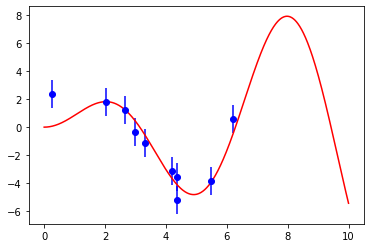

In [2]:
xmax = 10
X_space = np.linspace(0.001, xmax - 0.001, 1000)

# Get the "real" value
y_real = f(X_space)

n = 10
# Uniform sampling and add Gaussian noise
x_sample = np.random.random(n)*10

sigma = 1.0
noise = np.random.normal(0, sigma, n)
y_meas = f(x_sample) + noise

plt.plot(X_space,y_real,"r")
plt.errorbar(x_sample,y_meas,yerr=sigma,fmt="bo")

What do you understand the purpose of X_space is here?

In the real world we just have the data and we want to predict a new value (in this case, at $x_p$ = 5).


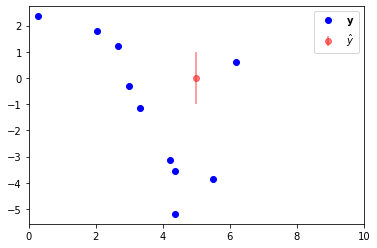

In [3]:
sigma = 1.0
y_p = 0.0
x_p = 5.0
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,y_p,yerr=sigma,fmt="ro",label="$\hat{y}$",alpha=0.5)
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()

We need to adopt a Kernel function. We will use an Exponential Quadratic Kernel here:
$$ \Sigma_{ij} = K(x_j,x_i) = \sigma^2 \exp\left(-\frac{(x_j - x_i)^2}{2\mathcal{l}^2} \right)$$

What does this metric look like in space?

In [4]:
x_comb = np.append(x_p,x_sample)

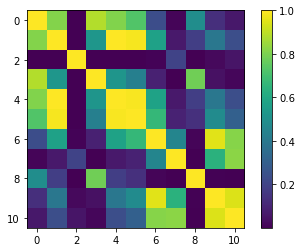

In [5]:
l = 1.0
X = np.atleast_2d(x_comb).T
M=sklearn.metrics.pairwise_distances(X,X)
S=sigma*sigma*np.exp(M*M/(-2*l*l))
plt.imshow(S)
plt.colorbar()

How do you intepret the elements on the diagonal? Off the diagonal?

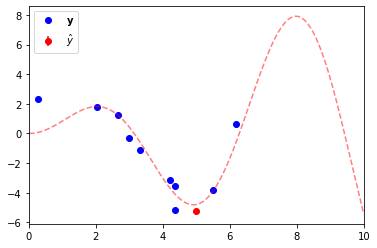

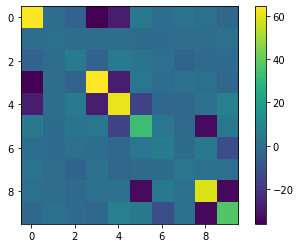

In [9]:
a = S[0,0]
b = S[0,1:]
C = S[1:,1:]
Cinv = np.linalg.inv(C)

lamb = 0.01
Cinv = np.linalg.inv(C + lamb*np.eye(C.shape[0],C.shape[1]))
mu_p = b.dot(Cinv).dot(y_meas)
sig_p = a - b.dot(Cinv).dot(b)
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,mu_p,yerr=sig_p,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()
plt.plot(X_space,y_real,"r--",alpha=0.5)

plt.figure()
plt.imshow(Cinv)
plt.colorbar()

What do you understand $C^{-1}$ encodes here?

We tried another one (a Periodic Kernel) here:

$K(x,x') = \sigma^2 exp\left(−\frac{2 sin^2\left(\frac{\pi(x− x′)}{p}\right)}{l^2}\right)$


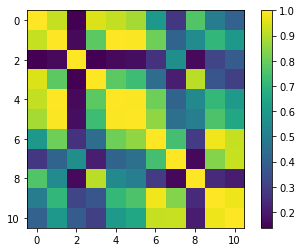

In [11]:
l = 1.0
p = 10.0
X = np.atleast_2d(x_comb).T
M=sklearn.metrics.pairwise_distances(X,X)
S=sigma*sigma*np.exp(2*np.sin(np.pi*M/p)*np.sin(np.pi*M/p)/(-l*l))
plt.imshow(S)
plt.colorbar()

In [ ]:
a = S[0,0]
b = S[0,1:]
C = S[1:,1:]
Cinv = np.linalg.inv(C)

lamb = 0.01
Cinv = np.linalg.inv(C + lamb*np.eye(C.shape[0],C.shape[1]))
# YOUR CODE HERE: see Single Point Prediction above
mu_p = b.dot(...
sig_p = a - b.dot(...
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,mu_p,yerr=sig_p,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()
plt.plot(X_space,y_real,"r--",alpha=0.5)

plt.figure()
plt.imshow(Cinv)
plt.colorbar()

We tried (yet) another one (a Periodic + Exponential Kernel) here:

$K(x,x') = \sigma^2 exp\left(−\frac{2 sin^2\left(\frac{\pi(x− x′)}{p}\right)}{l^2}\right) \sigma^2 exp\left(-\frac{(x_j - x_i)^2}{2\mathcal{l}^2} \right) $

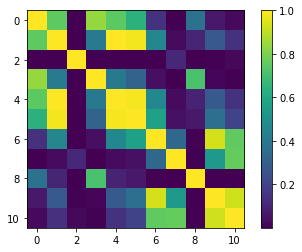

In [13]:
l = 1.0
p = 10.0
X = np.atleast_2d(x_comb).T
M=sklearn.metrics.pairwise_distances(X,X)
S=sigma*sigma*np.exp(2*np.sin(np.pi*M/p)*np.sin(np.pi*M/p)/(-l*l))*np.exp(M*M/(-2*l*l))
plt.imshow(S)
plt.colorbar()

In [ ]:
a = S[0,0]
b = S[0,1:]
C = S[1:,1:]
Cinv = np.linalg.inv(C)

lamb = 0.01
Cinv = np.linalg.inv(C + lamb*np.eye(C.shape[0],C.shape[1]))
# YOUR CODE HERE: see Single Point Prediction above
mu_p = b.dot(...
sig_p = a - b.dot(...
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,mu_p,yerr=sig_p,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()
plt.plot(X_space,y_real,"r--",alpha=0.5)

plt.figure()
plt.imshow(Cinv)
plt.colorbar()